<a href="https://colab.research.google.com/github/servetgulnaroglu/Forecasting/blob/task6/notebooks/n6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> Black Friday Customer Segmentation:</font>
### <font color='#475468'> Can you segment customers by their Black Friday purchasing behavior?</font>

## Initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfRet =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/black-friday-sales-data.csv', encoding = "ISO-8859-1")

In [4]:
dfRet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


WHITEBOARD >>

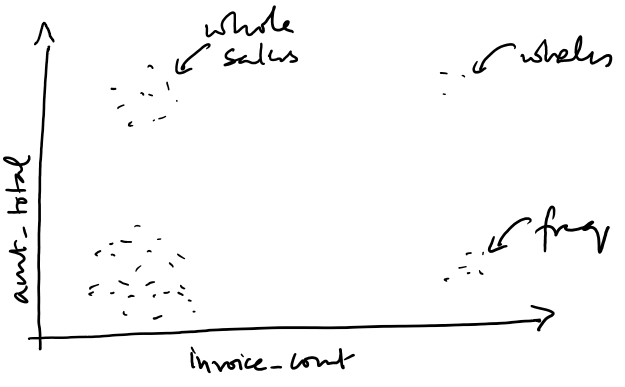

<< WHITEBOARD

## Prepare Data

In [6]:
dfRet.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)
dfRet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
# Aggregate by User_ID
dfRtc = (dfRet.groupby('User_ID').agg({'Product_ID':'nunique','Purchase':'sum'})
             .rename(columns={'Product_ID':'product_count', 'Purchase':'purchase_amt_total'})
            )
dfRtc.head()

,product_count,purchase_amt_total
User_ID,,
1000001,35,334093
1000002,77,810472
1000003,29,341635
1000004,14,206468
1000005,106,821001


In [10]:
# Scale data

X = dfRtc
X[X.columns] = scale(X[X.columns])

Note that previously we had a 'Target' column named 'y' which is what we used to train our models on.  In those models our learning was *Supervised* by the previously defined Target values.  However, in this dataset, there is no indication of prior grouping of the customers, so we are going to have to learn something about the data in an *Unsupervised Learning* manner.

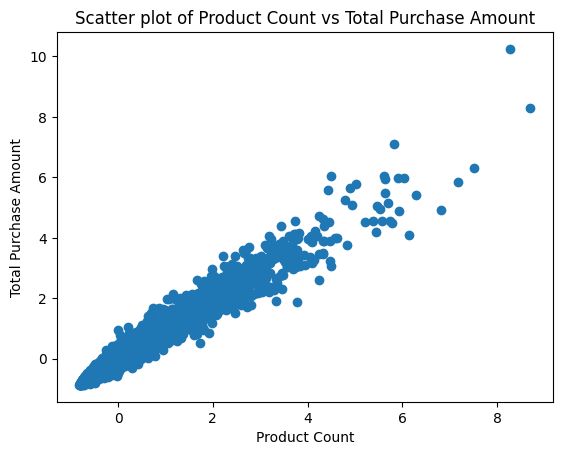

In [11]:
plt.scatter(X['product_count'], X['purchase_amt_total'])
plt.xlabel('Product Count')
plt.ylabel('Total Purchase Amount')
plt.title('Scatter plot of Product Count vs Total Purchase Amount')
plt.show()

In order to segment the customers, let's start by a random assignment and then *Iteratively* improve the result.

### K-Means Clustering

In order to segment the customers, let's start by randomly assigning them to 'n' clusters.  Thereafter, each customer is reassigned to another cluster that it is closer to, and this process is repeated until no more improvements are possible.  This method is known as **K-Means Clustering**.

WHITEBOARD >>

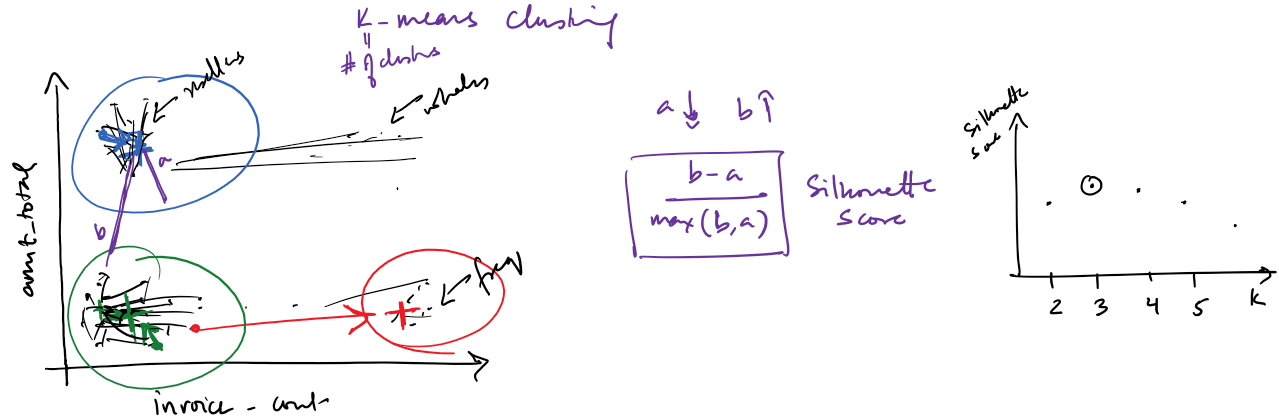

<< WHITEBOARD

In [12]:
# Build k-Means Clustering model

from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=3, random_state=1)
mdlKmcRtc.fit(X)
kMeans_labels = mdlKmcRtc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


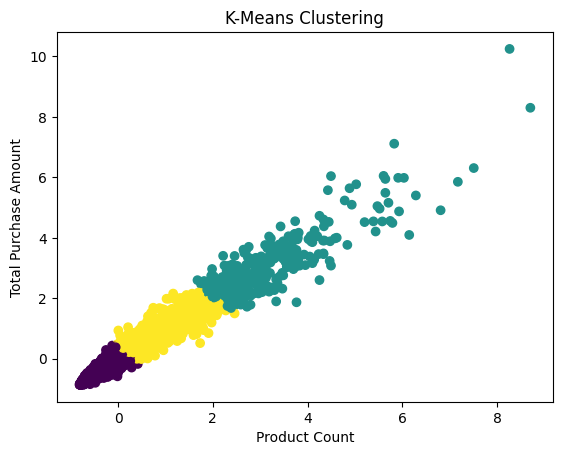

In [13]:
# Display k-Means clusters on scatter plot

plt.scatter(X['product_count'], X['purchase_amt_total'], c=kMeans_labels)
plt.xlabel('Product Count')
plt.ylabel('Total Purchase Amount')
plt.title('K-Means Clustering')
plt.show()


Since we don't have a ground-truth to calculate an accuracy score (like we did in Supervised Learning), we will need to measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation).  This is known as the **Silhouette Score**. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [14]:
# Evaluate quality of clusters
from sklearn.metrics import silhouette_score

silhouette_score(X, mdlKmcRtc.labels_)

0.6652767061197826

In [15]:
# Function for K-means Clustering
def cluster_kMeans(X, k):
    mdlKmcRtc = KMeans(n_clusters=k, random_state=1)
    mdlKmcRtc.fit(X)
    kMeans_labels = mdlKmcRtc.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcRtc.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [16]:
# Iterate over different values of k to determine the best silhouette score

for k in [2, 3, 4, 5, 6]:
    kMeans_labels, kMeans_sil_score = cluster_kMeans(X, k)
    print('k:', k, '\tSilhouette Score:', kMeans_sil_score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 2 	Silhouette Score: 0.7261408452722743


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 3 	Silhouette Score: 0.6652767061197826


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 4 	Silhouette Score: 0.6076933751194181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 5 	Silhouette Score: 0.5846368698345823


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k: 6 	Silhouette Score: 0.5749005958029301


The best cluster size seems to be '2' at which the Silhouette Score is 0.95.

Let's see if we can improve the customer segmentation by starting with each customer in its own cluster and then *Hierarchically* grouping them together... (This is only possible when the dataset is small)

### Hierarchical Clustering

**Hierarchical clustering**, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

WHITEBOARD >>

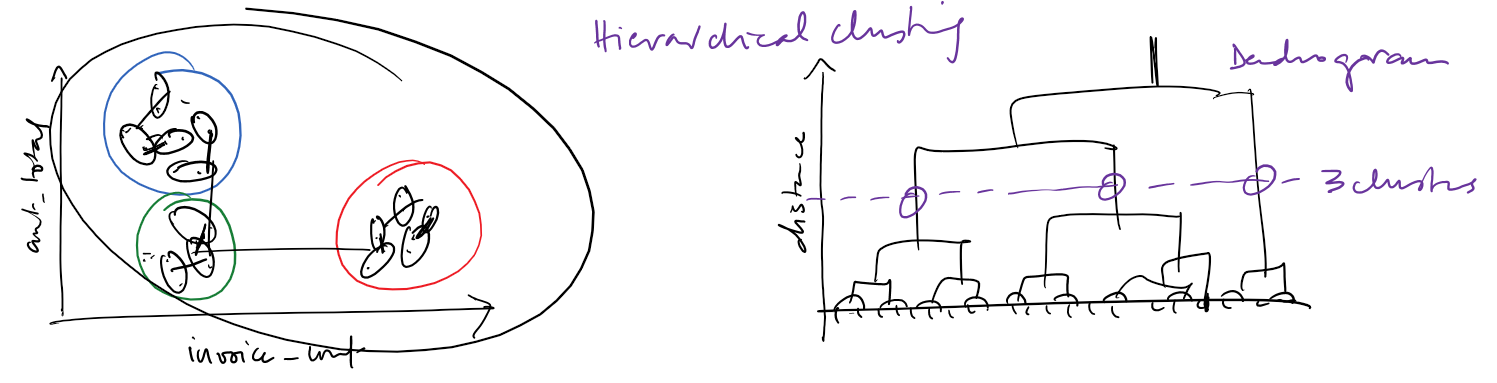

<< WHITEBOARD

In [17]:
# Generate linkages between data points
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'ward')

Text(0.5, 1.0, 'Hierarchical Clustering')

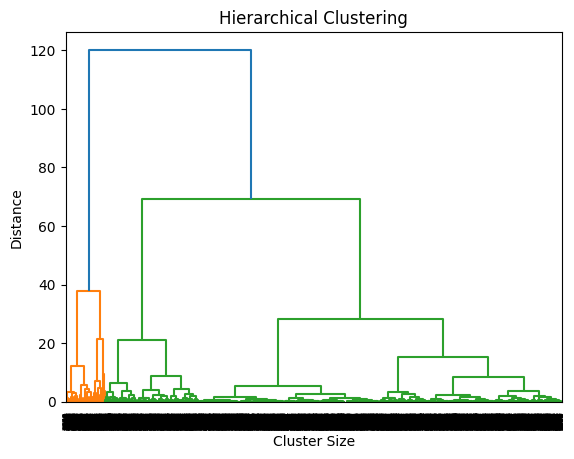

In [18]:
# Visualize Dendrogram of Clusters

hierarchy.dendrogram(Z)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering')

The greater the y-axis distance, the more spaced apart the clusters are.  So, the dendrogram shows 2 clusters are ideal, but 3 is ok too.  Having said that, when building a hierarchical clustering model, we do provide K as an input so it doesn't have to build the full dendrogram (especially for large datasets).

In [19]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=3)
mdlHrcRtc.fit(X)
hClust_labels = mdlHrcRtc.labels_

In [20]:
silhouette_score(X, mdlHrcRtc.labels_)

0.6415136338507116

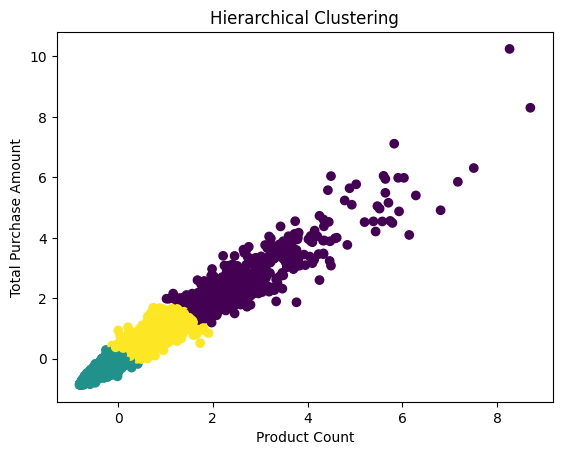

In [21]:
# Display Hierarchical clusters on scatter plot

plt.scatter(X['product_count'], X['purchase_amt_total'], c=hClust_labels)
plt.xlabel('Product Count')
plt.ylabel('Total Purchase Amount')
plt.title('Hierarchical Clustering')
plt.show()


In [22]:
# Function for Hierarchical Clustering
def cluster_hierarchy(X, k):
    mdlHrcRtc = AgglomerativeClustering(n_clusters=k)
    mdlHrcRtc.fit(X)
    hClust_labels = mdlHrcRtc.labels_
    hClust_sil_score = silhouette_score(X, mdlHrcRtc.labels_)
    return (hClust_labels, hClust_sil_score)

In [23]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    hClust_labels, hClust_sil_score = cluster_hierarchy(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', hClust_sil_score)

k:  2 		 Silhouette Score:  0.7454258816188772
k:  3 		 Silhouette Score:  0.6415136338507116
k:  4 		 Silhouette Score:  0.6399901867458228
k:  5 		 Silhouette Score:  0.506267207431757
k:  6 		 Silhouette Score:  0.5070500323467254


Based on the silhouette scores obtained from both K-Means and Hierarchical Clustering, the ideal number of clusters appears to be 2, with the highest silhouette score of 0.7454 for K-Means and a slightly better score of 0.9506 for Hierarchical Clustering. This consistency in cluster size across different methods is reassuring, indicating a robust clustering result.

However, even with a slightly better silhouette score in Hierarchical Clustering, we can consider more sophisticated approaches to clustering. As human beings, we often group data points by identifying dense regions and ignoring anomalies or outliers. This intuitive approach can be emulated using density-based clustering models, which are particularly suitable for data that exhibits clear patterns or clusters of varying shapes and densities. These models can offer more nuanced insights, especially in complex datasets.

utexas_ds_orie_divider_gray.png

### DBScan Clustering and Anomaly Detection

DBScan stands for Density-Based Spatial Clustering of Applications with Noise.  Given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

WHITEBOARD >>

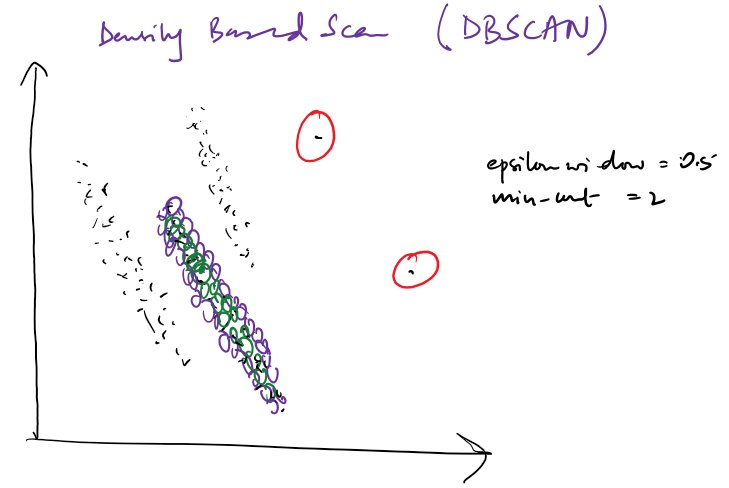

<< WHITEBOARD

In [24]:
# Build DBScan model

from sklearn.cluster import DBSCAN

mdlDbsRtc = DBSCAN(eps=0.2)
mdlDbsRtc.fit(X)
dbscan_labels = mdlDbsRtc.labels_

In [25]:
silhouette_score(X, dbscan_labels)

0.6568861530009426

In [26]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_clusters

4

In [27]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

60

Text(0.5, 1.0, 'DBSCAN Clustering')

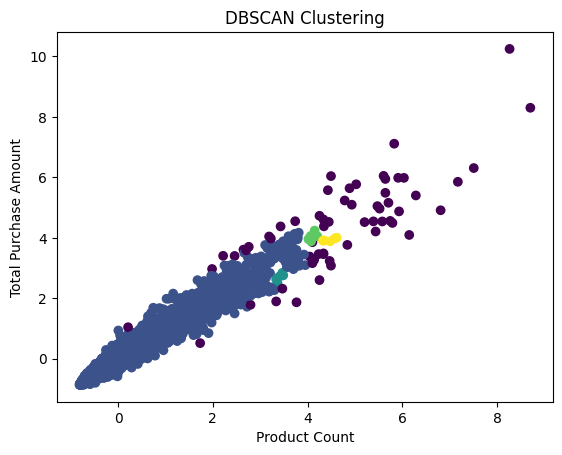

In [29]:
# Display DBSCAN clusters on scatter plot

plt.scatter(X['product_count'], X['purchase_amt_total'], c=dbscan_labels)
plt.xlabel('Product Count')
plt.ylabel('Total Purchase Amount')
plt.title('DBSCAN Clustering')

In [30]:
# Function for DBScan Clustering

def cluster_dbscan(X, e):
    mdlDbsRtc = DBSCAN(eps=e)
    mdlDbsRtc.fit(X)
    dbscan_labels = mdlDbsRtc.labels_
    dbscan_sil_score = silhouette_score(X, dbscan_labels)

    # count number of clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_anomalies = list(dbscan_labels).count(-1)
    return(dbscan_clusters, dbscan_anomalies, dbscan_sil_score)

In [31]:
# Iterate over different values of eps to determine best silhouette score

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(X, eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps:  0.1 	 Clusters:  10 	 Noise:  255 	 Silhouette Score:  0.5661972006437398
eps:  0.2 	 Clusters:  4 	 Noise:  60 	 Silhouette Score:  0.6568861530009426
eps:  0.3 	 Clusters:  1 	 Noise:  40 	 Silhouette Score:  0.8024435045110658
eps:  0.4 	 Clusters:  3 	 Noise:  20 	 Silhouette Score:  0.7872811055480032
eps:  0.5 	 Clusters:  3 	 Noise:  15 	 Silhouette Score:  0.7927236996940684
eps:  0.6 	 Clusters:  3 	 Noise:  7 	 Silhouette Score:  0.7943119387842261
eps:  0.7 	 Clusters:  2 	 Noise:  6 	 Silhouette Score:  0.8011975322057425


Based on the DBSCAN clustering results, the highest silhouette score was achieved with an epsilon value of 0.3, resulting in one primary cluster and a collection of outliers. However, a closer look reveals that the Hierarchical Clustering model provided better results, as evidenced by higher silhouette scores with fewer clusters, making it a more appropriate choice for this dataset.

In this scenario, there isn't a strong reason to believe that density plays a significant role in defining clusters, which aligns with the hierarchical method's superior performance. Nonetheless, DBSCAN remains valuable for identifying outliers, which can be crucial for understanding the dataset's structure and for refining analyses by focusing on the primary clusters.

## Takeaways

* Introduced unsupervised learning problems to cluster data points using *K-Means Clustering* and *Hierarchical Clustering*
* Explored a different method of clustering and anomaly detection using density via *DBScan*
* Evaluated the performance of such unsupervised learning models via the *Silhouette Score* due to the absence of ground-truth information

WHITEBOARD >>

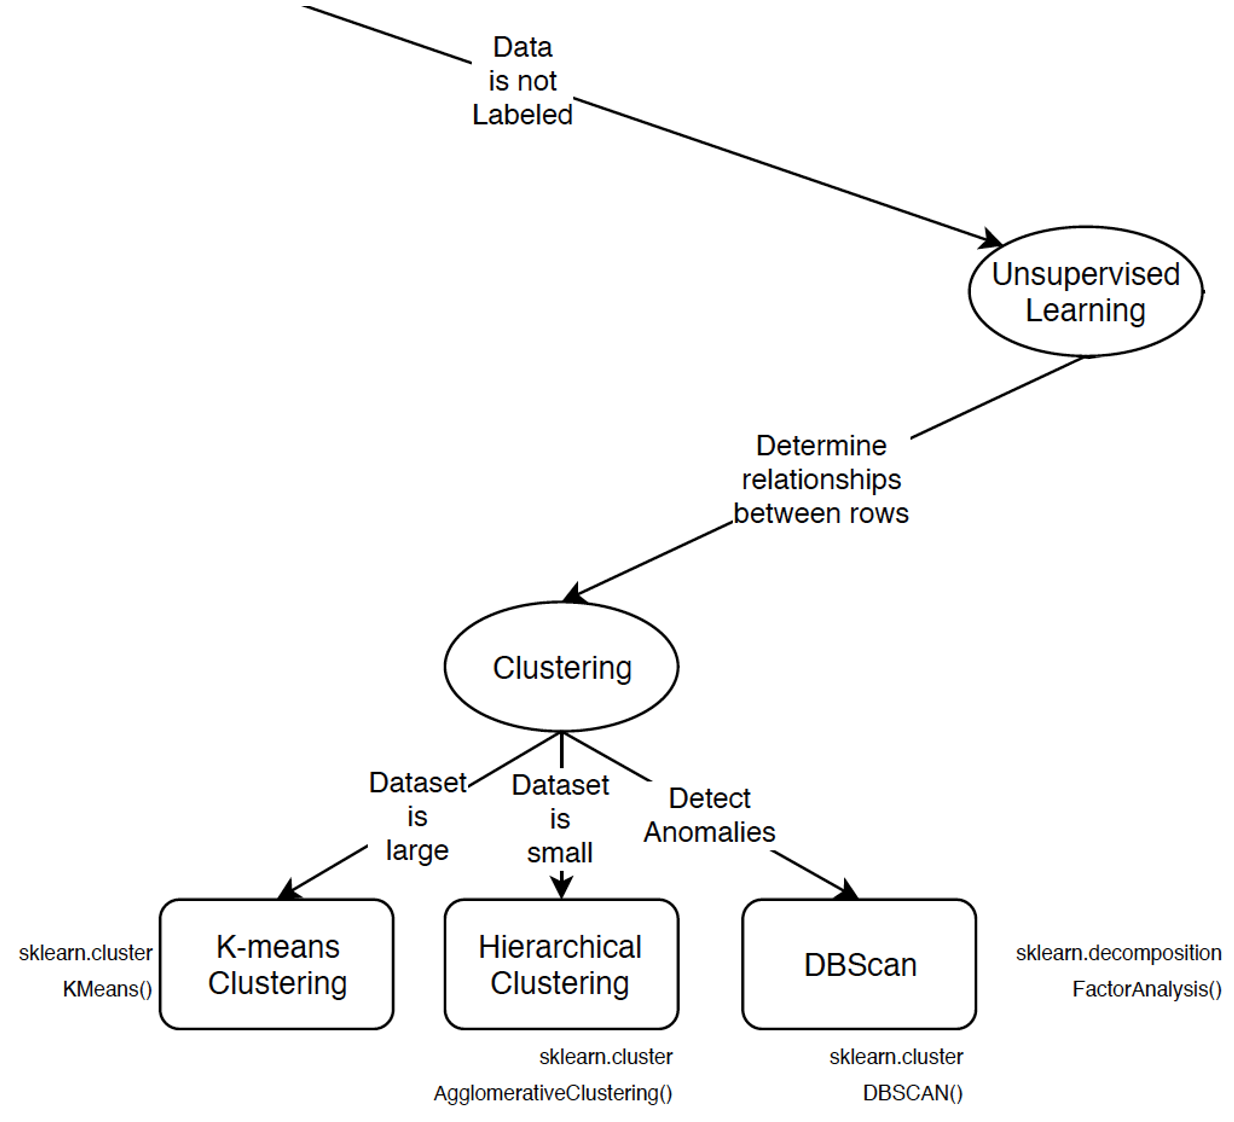

<< WHITEBOARD

utexas_ds_orie_divider_gray.png